# <font color='#4C5FDA'><small>**PROYECTO FINAL IA 1: Detección de diabetes con modelos de Deep Learning**</small></font>

# <li> Brayan Yesid Quintero Santander 2221707</li>
# <li> Juan David Paipa Jaimes   </li>




---



# <font color='#ff0000'><small>**PRIMERA ENTREGA**</small></font>



---



# <font color='#4C5FDA'><small>**Librerías**</small></font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='#4C5FDA'><small>**DataSet**</small></font>

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1qWeGlzHSseyOk1h4Vq7ry4Y5GMJ1zPxv') # Obtención del dataset

In [ ]:
df.describe() # Descripción del dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# <font color='#4C5FDA'><small>**Características del DataSet**</small></font>

<Axes: xlabel='Pregnancies', ylabel='Count'>

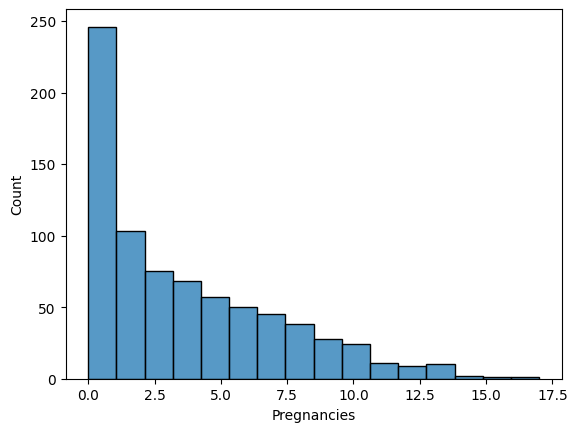

In [ ]:
sns.histplot(data = df, x= df['Pregnancies'])

In [ ]:
# Contar cuántos elementos tienen Pregnancies igual a 0
count_preg_zero = (df['Pregnancies'] == 0).sum()

print(f"Cantidad de elementos donde Pregnancies es igual a 0: {count_preg_zero}")

Cantidad de elementos donde Pregnancies es igual a 0: 111


In [ ]:
# Contar cuántos elementos tienen Presión arterial igual a 0
count_preg_zero = (df['BloodPressure'] == 0).sum()

print(f"Cantidad de elementos donde Presión arterial es igual a 0: {count_preg_zero}")#algo raro aca

Cantidad de elementos donde Presión arterial es igual a 0: 35


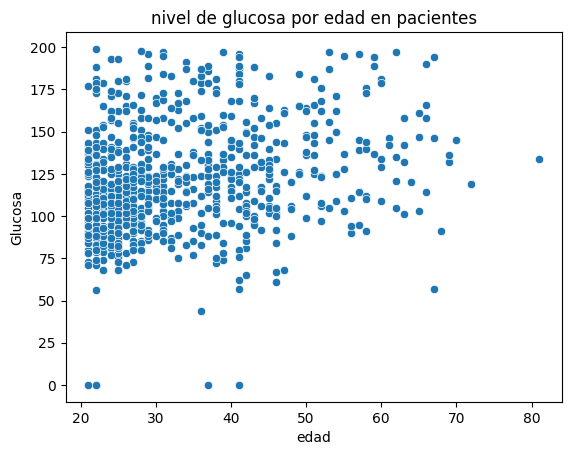

In [ ]:
sns.scatterplot(data = df, x = df['Age'], y=df['Glucose'])
plt.title('nivel de glucosa por edad en pacientes')
plt.xlabel('edad')
plt.ylabel('Glucosa')
plt.show()

In [ ]:
max_gluc = df['Glucose'].max()
max_age = df['Age'].max()
max_age, max_gluc

(81, 199)

In [ ]:
datos_persona_mayorEdad = df[df['Age'] == 81]
datos_persona_mayorGlucosa = df[df['Glucose'] == 199]
print("Persona con mayor Edad: \n")
print(datos_persona_mayorEdad)
print("\n")
print("Persona con mayor glucosa: \n")
print(datos_persona_mayorGlucosa)

Persona con mayor Edad: 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
459            9      134             74             33       60  25.9   

     DiabetesPedigreeFunction  Age  Outcome  
459                      0.46   81        0  


Persona con mayor glucosa: 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   

     DiabetesPedigreeFunction  Age  Outcome  
661                     1.394   22        1  


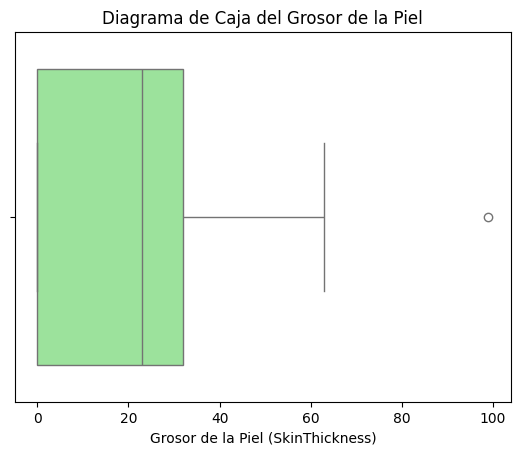

In [ ]:
sns.boxplot(x=df['SkinThickness'], color='lightgreen')
plt.title('Diagrama de Caja del Grosor de la Piel')
plt.xlabel('Grosor de la Piel (SkinThickness)')
plt.show()

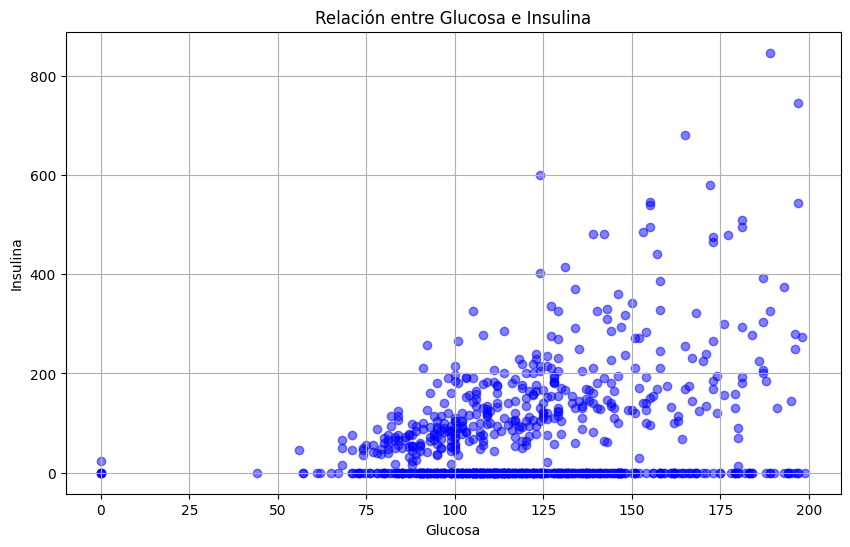

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['Insulin'], alpha=0.5, color='blue')
plt.title('Relación entre Glucosa e Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.grid(True)
plt.show()

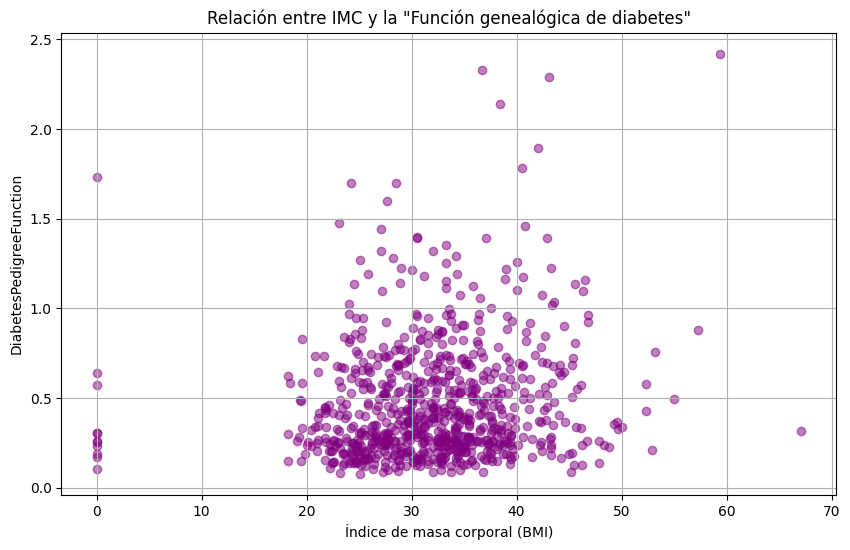

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['DiabetesPedigreeFunction'], alpha=0.5, color='purple')
plt.title('Relación entre IMC y la "Función genealógica de diabetes"')
plt.xlabel('Índice de masa corporal (BMI)')
plt.ylabel('DiabetesPedigreeFunction')
plt.grid(True)
plt.show()

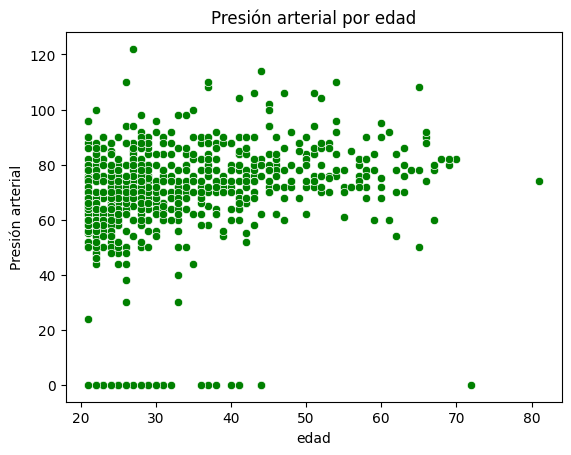

In [ ]:
sns.scatterplot(data = df, x = df['Age'], y=df['BloodPressure'], color='green')
plt.title('Presión arterial por edad')
plt.xlabel('edad')
plt.ylabel('Presión arterial')
plt.show()

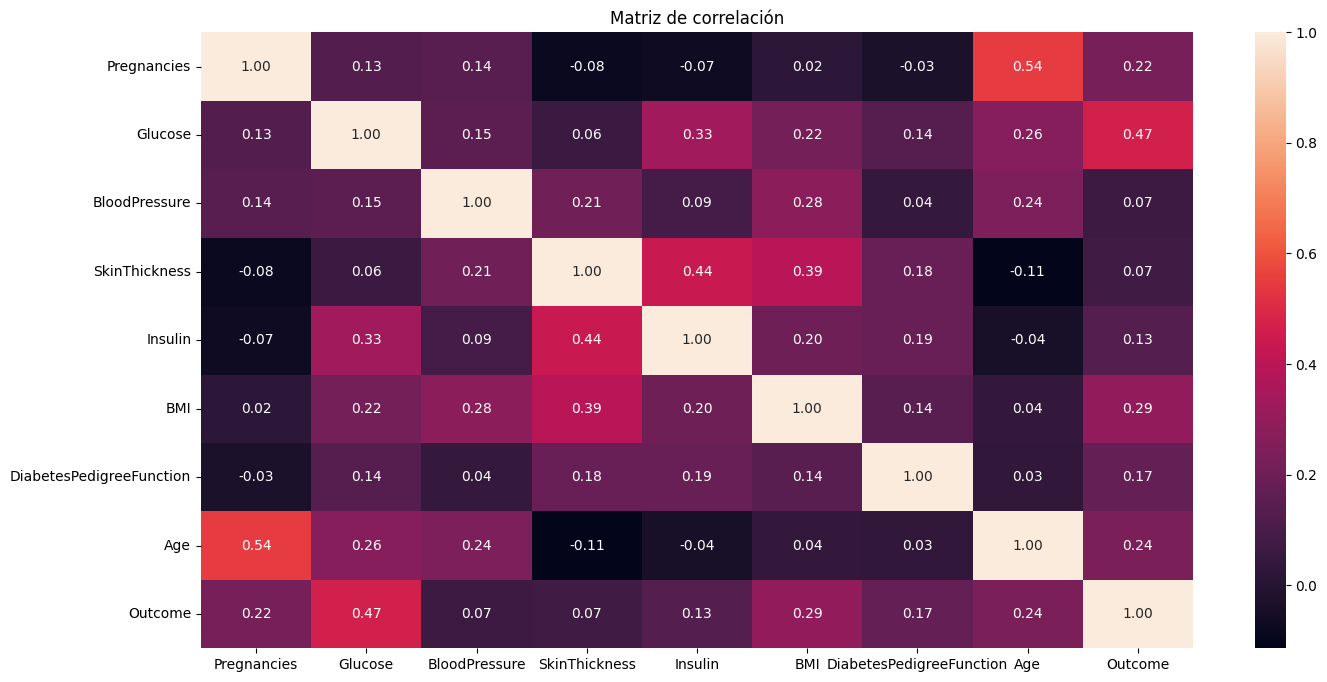

In [ ]:
plt.subplots(figsize=(16,8))
corr = df[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# df.head()

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33




---



## <font color='#ff0000'><small>**SEGUNDA ENTREGA**</small></font>



---



# <font color='#4C5FDA'><small>**Clasificación (Estimadores)**</small></font>

<font color='#4C5FDA'><small>**CLASIFICACION**</small></font>
<font color='#4C5FDA'><small>**RANDOMFOREST**</small></font>

In [ ]:
np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='log_loss', random_state=21)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
myacc = accuracy_score(y_pred, y_test)

print(myacc)

0.7077922077922078


<font color='#4C5FDA'><small>**CLASIFICACION**</small></font>
<font color='#4C5FDA'><small>**SUPER VECTOR MACHINE**</small></font>

In [ ]:
np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
rf_classifier = SVC(C=5.0, kernel='rbf')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
myacc = accuracy_score(y_pred, y_test)

print(myacc)

0.7207792207792207


<font color='#4C5FDA'><small>**CLASIFICACION**</small></font>
<font color='#4C5FDA'><small>**DECISION TREE**</small></font>

In [ ]:
np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
rf_classifier = DecisionTreeClassifier(max_depth=4)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
myacc = accuracy_score(y_pred, y_test)

print(myacc)

0.7467532467532467


<font color='#4C5FDA'><small>**CLASIFICACION**</small></font>
<font color='#4C5FDA'><small>**NAIVE GAUSSIAN BAYES**</small></font>

In [ ]:
np.random.seed(21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
rf_classifier = GaussianNB()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
myacc = accuracy_score(y_pred, y_test)

print(myacc)

0.7272727272727273


# <font color='#4C5FDA'><small>**Tuning de parámetros y gráficas**</small></font>

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Se crea el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, verbose=1)
y_pred = model.predict(X_test, verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 9.2051 
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.6724 
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6160 - loss: 0.6553 
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.6227
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.6160 
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.6629 
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.6018 
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6756 
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - loss: 0.6216 
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5940 
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6776 - loss: 0.6152
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,492 (107.39 KB)

 Trainable params: 27,490 (107.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# <font color='#4C5FDA'><small>**tuning de parámetros-train_test_split**</small></font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def learning_curves_classification(model, param_name, param_values, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []

    for value in param_values:
        model.set_params(**{param_name: value})
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_scores.append(accuracy_score(y_train, y_train_pred))
        test_scores.append(accuracy_score(y_test, y_test_pred))

    plt.figure(figsize=(8, 6))
    plt.plot(param_values, train_scores, label='Training Accuracy', marker='o')
    plt.plot(param_values, test_scores, label='Test Accuracy', marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f"Learning Curve for {model.__class__.__name__} ({param_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

**DecisionTreeClassifier**

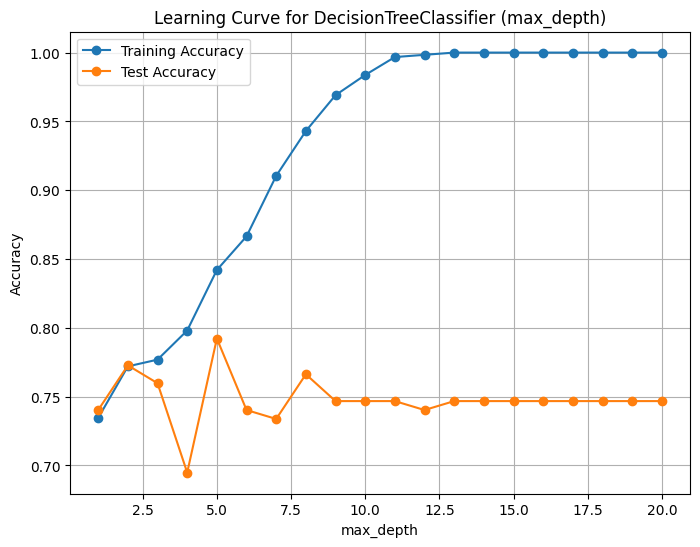

In [ ]:
dt = DecisionTreeClassifier(random_state=41)
learning_curves_classification(dt, 'max_depth', param_values=range(1, 21), X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

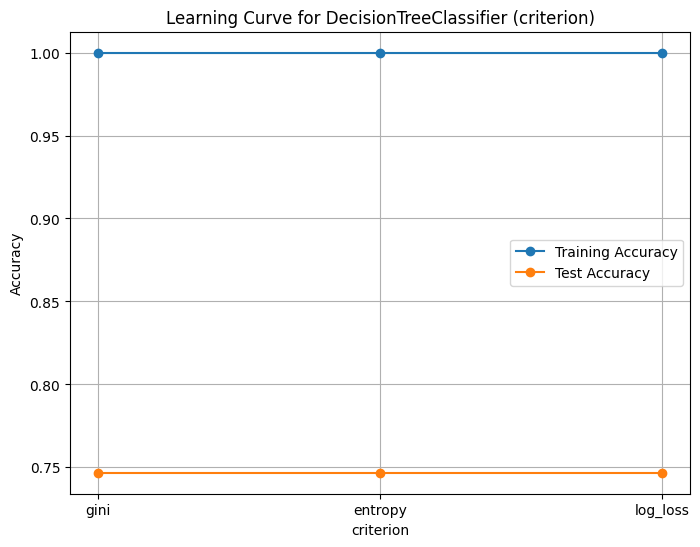

In [ ]:
learning_curves_classification(dt, 'criterion', param_values=['gini', 'entropy', 'log_loss'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

**RandomForestClassifier**

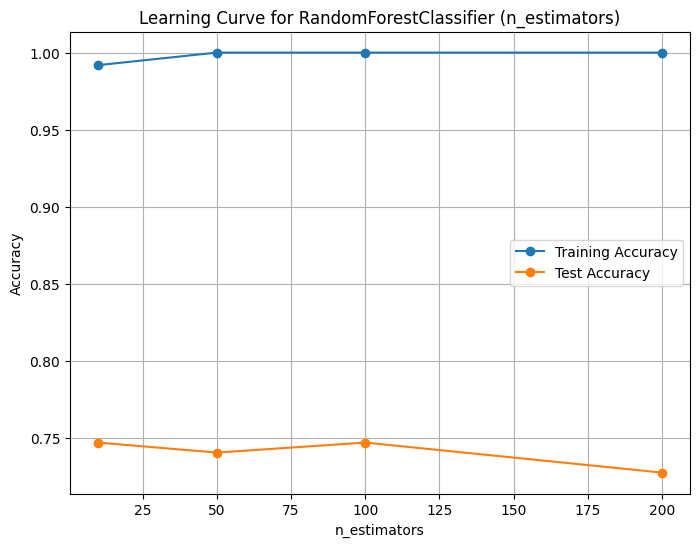

In [ ]:
rf = RandomForestClassifier(random_state=41)
learning_curves_classification(rf, 'n_estimators', param_values=[10, 50, 100, 200], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

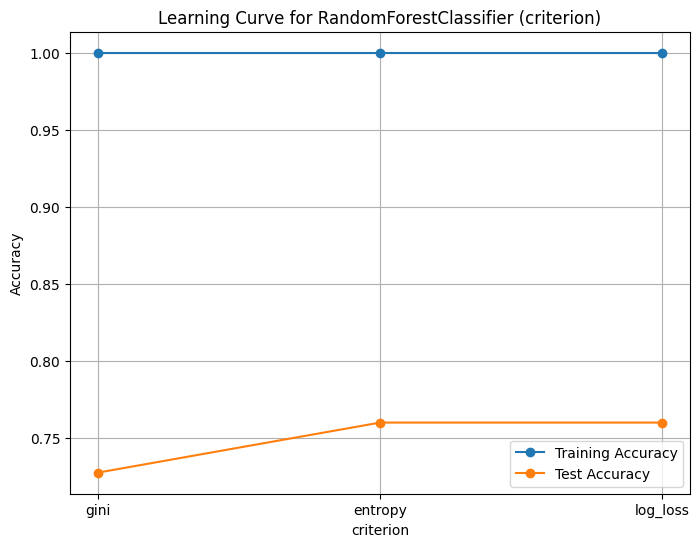

In [ ]:
learning_curves_classification(rf, 'criterion', param_values=['gini', 'entropy', 'log_loss'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

**SVC**

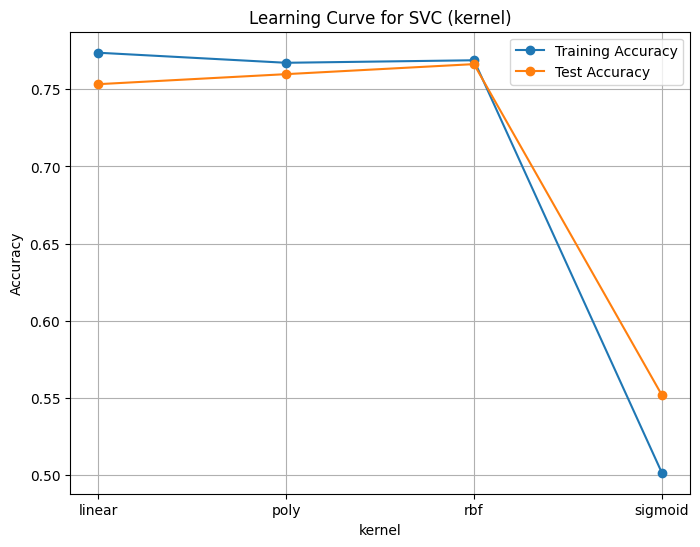

In [ ]:
svc = SVC(random_state=41)
learning_curves_classification(svc, 'kernel', param_values=['linear', 'poly', 'rbf', 'sigmoid'], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

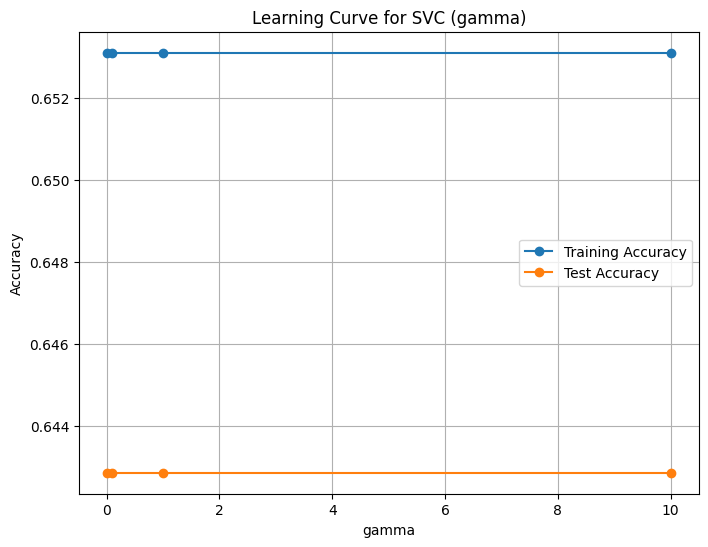

In [ ]:
learning_curves_classification(svc, 'gamma', param_values=[0.01, 0.1, 1, 10], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# <font color='#4C5FDA'><small>**tuning de parámetros-crossVal**</small></font>

In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    model_name = est.__class__.__name__

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.title(f"Performance vs. Number of Folds ({model_name})")
    plt.legend()

**DecisionTreeClassifier**

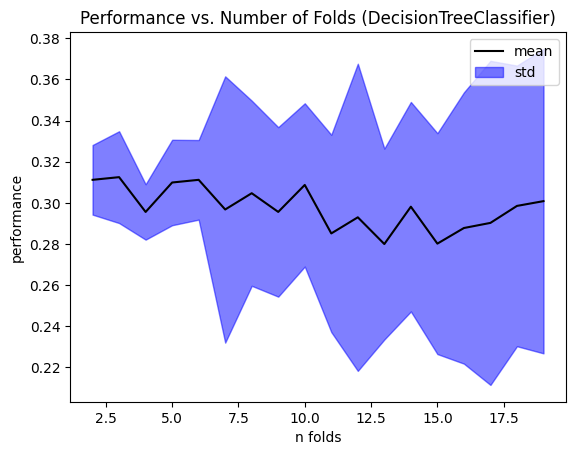

In [ ]:
show_curve(DecisionTreeClassifier())

**RandomForestClassifier**

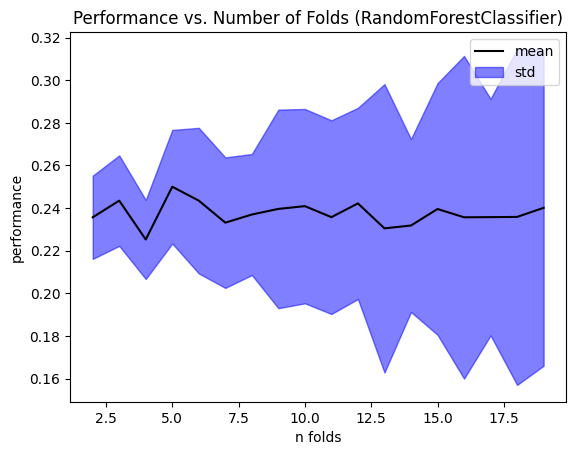

In [ ]:
show_curve(RandomForestClassifier())

**SVC**

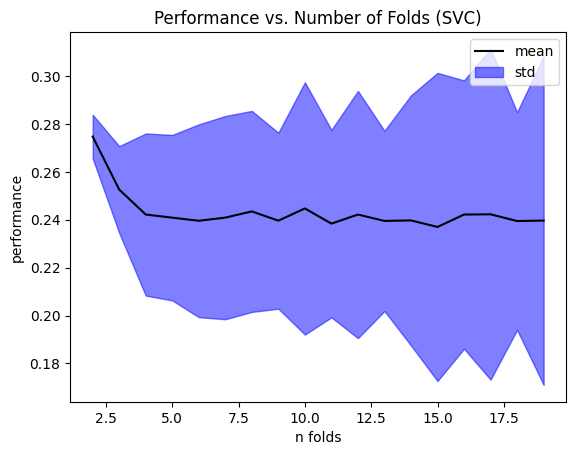

In [ ]:
show_curve(SVC())



---



## <font color='#ff0000'><small>**TERCERA ENTREGA**</small></font>



---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# <font color='#4C5FDA'><small>**Modelo de 3 capas**</small></font>

In [ ]:
# Se crea el modelo de 3 capas ocultas
model1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,978 (42.88 KB)

 Trainable params: 10,978 (42.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=15, verbose=1).history
y_pred = model1.predict(X_test, verbose=1)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5012 - loss: 19.1840  
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6826 - loss: 0.6412 
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - loss: 0.6464 
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.7018 
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6675 - loss: 0.6208 
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.5917 
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.6485 
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6930 - loss: 0.6038 
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.5842 
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7099 - loss: 0.6055 
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6931 - loss: 0.5977 
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)

print('Test accuracy:', test_acc1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6266 - loss: 0.7915  
Test accuracy: 0.6103895902633667


# <font color='#4C5FDA'><small>**Modelo de 6 capas**</small></font>

In [ ]:
# Se crea el modelo de 6 capas ocultas
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,514 (236.38 KB)

 Trainable params: 60,514 (236.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=15, verbose=1).history
y_pred = model2.predict(X_test, verbose=1)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6491 - loss: 1.4323   
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6369 - loss: 0.7031 
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 0.6087 
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.6306 
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 0.6144  
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.6175 
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.6501 
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5455 
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 0.6077 
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6613 - loss: 0.7468 
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5927 
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

print('Test accuracy:', test_acc2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.6363  
Test accuracy: 0.6298701167106628


# <font color='#4C5FDA'><small>**Modelo de 10 capas**</small></font>

In [ ]:
# Se crea el modelo de 10 capas ocultas
model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,562 (494.38 KB)

 Trainable params: 126,562 (494.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='crossentropy',
            metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=15, verbose=1).history
y_pred = model3.predict(X_test, verbose=1)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5503 - loss: 0.7314   
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5998 - loss: 0.6985 
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 0.6427 
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - loss: 0.6135 
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6641 - loss: 0.6303
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.6259 
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.6283
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6113 
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5967 
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5632 
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7101 - loss: 0.5842
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [ ]:
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)

print('Test accuracy:', test_acc3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6835 - loss: 0.5867  
Test accuracy: 0.6298701167106628


# <font color='#4C5FDA'><small>**Gráficas**</small></font>

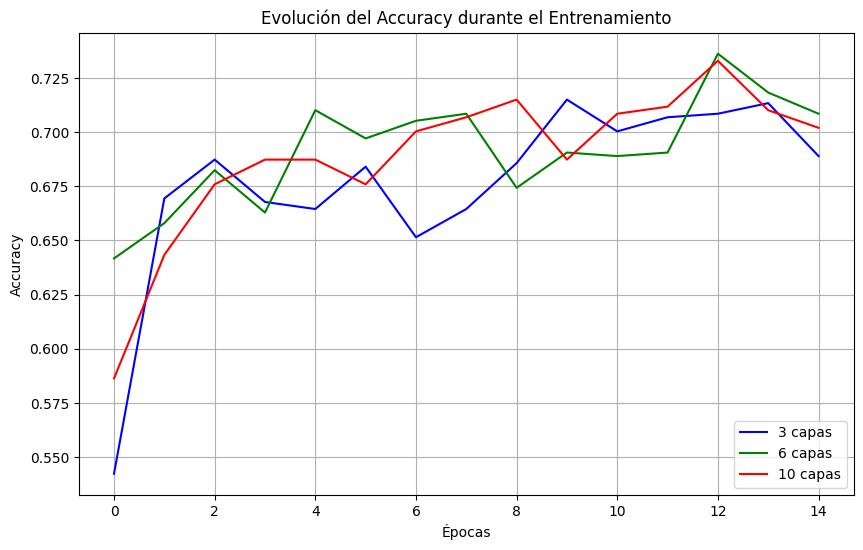

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history1['accuracy'], label='3 capas', color='blue')
plt.plot(history2['accuracy'], label='6 capas', color='green')
plt.plot(history3['accuracy'], label='10 capas', color='red')

plt.title('Evolución del Accuracy durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

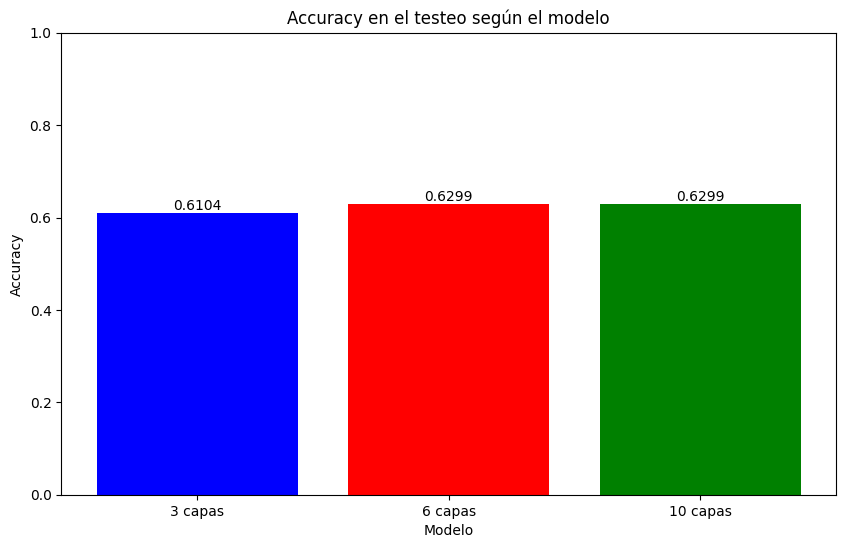

In [ ]:
plt.figure(figsize=(10, 6))

titulos = ['3 capas', '6 capas', '10 capas']
test_accuracys = [test_acc1, test_acc2, test_acc3]
colores = ['blue', 'red', 'green']

barras = plt.bar(titulos, test_accuracys, color=colores)

for barra in barras:
  altura = barra.get_height()
  plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.4f}', ha='center', va='bottom')

plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Accuracy en el testeo según el modelo')
plt.ylim(0, 1)
plt.show()